from: https://towardsdatascience.com/prototyping-a-recommender-system-step-by-step-part-1-knn-item-based-collaborative-filtering-637969614ea

In [1]:
import modin.pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [30]:
df_movies = pd.read_csv('data/movies.csv'
                        , usecols=['movieId', 'title']
                        , dtype={'movieId': 'int64', 'title': 'str'}
                       )

df_ratings = pd.read_csv('data/ratings.csv'
                         , usecols=['userId', 'movieId', 'rating']
                         , dtype={'userID': 'int64', 'movieID': 'int64', 'rating': 'float32'}
                        )

In [3]:
df_movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [4]:
df_ratings.head()

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5


In [31]:
df_movies.shape

(58098, 2)

In [32]:
df_ratings.shape

(27753444, 3)

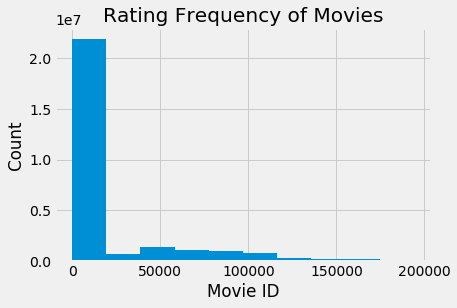

In [7]:
df_ratings.movieId.hist()
plt.xlabel('Movie ID')
plt.ylabel('Count')
plt.title('Rating Frequency of Movies');

In [39]:
df_ratings = df_ratings.loc[df_ratings.movieId <= 13500]

In [40]:
df_ratings.shape

(21863987, 3)

In [41]:
df_ratings.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [42]:
from scipy.sparse import csr_matrix

df_movie_features = df_ratings.pivot(index='userId'
                                     , columns='movieId'
                                     , values='rating'
                                    )

mat_movie_features = csr_matrix(df_movie_features.values)

ValueError: Unstacked DataFrame is too big, causing int32 overflow